In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

Populating the interactive namespace from numpy and matplotlib


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data=pd.read_pickle('cleaned_df_final.pkl')
data.head()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Completion History),CF (Team ID),CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list
0,196,bf7a5b63ef96de9709f1895361fb19f1,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:26,132.5,NaN,Show what you know A,Assessment_A,5,...,"1,1,1,1,0,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:26:26.214 UTC,2016-05-02 16:26:26.260 UTC,"[no, because, you, don't, change, the, denomin...",[],[]
1,197,38fee116e6f889f4f8947e8d3223c4e9,Stu_005a9729f8e3869ff12b105e0f7bb82e,S276199344502b5bb84fdeb28414e59df,5/2/16 12:36,581,NaN,Show what you know A,Assessment_A,6,...,"1,1,1,1,1,0,0,0,0,0,0,0,0,0,0",NaN,NaN,NaN,236.0,2016-05-02 16:36:09.528 UTC,2016-05-02 16:36:09.561 UTC,"[i, do, not, know, the, answer]",[],[]
2,723,614e41dfdf003a358e222dd25bd3fb37,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:32,15.75,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,1a,...,"0,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:32:27.244 UTC,2016-05-04 16:32:27.258 UTC,"[first, you, need, to, double, the, denominato...",[],[]
3,758,d17966ae23e35d2fae1bbeb81a43420f,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:35,0.333,NaN,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,2a,...,"1,0,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:35:03.999 UTC,2016-05-04 16:35:04.36 UTC,"[first, multiply, the, denominator, by, two, t...",[],[]
4,801,34ee74f0538238c268ee22dea94817d8,Stu_005a9729f8e3869ff12b105e0f7bb82e,S8b8b56ba097e11d7d5e2da54ccf54883,5/4/16 12:37,11,Student2,Equivalent Erroneous Collaboration,Erroneous_Equivalent_Collaboration,3a,...,"1,1,0,0,0,0,0,0",RGFyaWVuWixPbGl2aWFN,1 of 2,"S8b8b56ba097e11d7d5e2da54ccf54883,S031525ce931...",32.0,2016-05-04 16:37:25.446 UTC,2016-05-04 16:37:25.457 UTC,"[first, multiply, 8, NUMBER, by, 2, NUMBER, th...","[8, 2]",[]


In [3]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'][i]=temp_answer

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
feature_keyword_list=['fraction','FRACTION','NUMBER','EUQATION','right','correct', 'wrong', 'incorrect',
                   'denominator','equivalent',  'numerator','larger','smaller','bigger',
                  'common','mixed','error','compare','least','subtract','multiply','equal','plus','divide']

In [5]:
feature_keyword_list=np.load('select_gram_list.npy')

In [6]:
keyword_matrix=[]
for i in range(len(data)):
    temp_answer=data.answer.iloc[i]
    temp_array=[]
    for temp_keyword in feature_keyword_list:
        temp_count=temp_answer.count(temp_keyword)
        temp_array.append(temp_count)
    keyword_matrix.append(temp_array)

In [7]:
import codecs
from sklearn import feature_extraction 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
data['Level (ProblemSet)'].value_counts()

Erroneous_LCD_Collaboration                           1318
Erroneous_Comparing_Collaboration                     1192
Assessment_A                                           846
Assessment_B                                           835
Erroneous_LCD_Individual                               819
Erroneous_Comparing_Individual                         732
Erroneous_Equivalent_Collaboration                     724
Erroneous_Equivalent_Individual                        498
Erroneous_EquivalentLCD_Collaboration                  158
Erroneous_ComparingAddingSubtracting_Collaboration     102
Erroneous_NamingMaking_Collaboration                    76
Erroneous_NamingMaking_Individual                       13
Erroneous_ComparingAddingSubtracting_Individual         12
Erroneous_EquivalentLCD_Individual                       4
Name: Level (ProblemSet), dtype: int64

In [9]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [10]:
data['problem']=0
for i in range(len(data)):
    data['problem'][i]=int(data['Problem Name'][i][0])
data['problem'].value_counts()

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [11]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [12]:
data['Student Response Subtype']=data['Student Response Subtype'].fillna('individual')
data['Student Response Subtype'].value_counts()

individual    5515
Student1       959
Student2       853
Student3         2
Name: Student Response Subtype, dtype: int64

In [13]:
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8).fit(tfidf)
km_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]
'''

"\nfrom sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=8).fit(tfidf)\nkm_predict=kmeans.predict(tfidf_vectorizer.transform(all_answer))\ndata['km_cluster']=0\nfor i in range(len(data)):\n    data['km_cluster'][i]=km_predict[i]\n"

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10).fit(keyword_matrix)
km_predict=kmeans.predict(keyword_matrix)
km_predict

array([8, 7, 2, ..., 4, 7, 1])

In [15]:
data['km_cluster']=0
for i in range(len(data)):
    data['km_cluster'][i]=km_predict[i]

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['km_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Show what you know B                                          0.145078
Show what you learned A                                       0.124352
Show what you know A                                          0.119171
LCD Erroneous Individual                                      0.119171
Comparing Erroneous Collaboration                             0.103627
Show what you learned B                                       0.093264
Comparing Erroneous Individual                                0.067358
LCD Erroneous Collaboration                                   0.051813
Equivalent Erroneous Individual                               0.051813
Comparing, Adding, and Subtracting Erroneous Collaboration    0.031088
Equivalent and LCD Erroneous Collaboration                    0.031088
Naming and Making Erroneous Collaboration                     0.020725
Comparing Erroneous Group                                     0.015544
Equivalent Erroneous Collaboration                     

In [17]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['problem'].value_counts()/len(data[data['km_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

For K-means cluster 0
6    0.284974
5    0.233161
1    0.227979
2    0.139896
3    0.046632
4    0.036269
8    0.015544
7    0.015544
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 1
5    0.174910
6    0.168817
2    0.141219
1    0.140502
3    0.117204
4    0.111828
7    0.078136
8    0.067384
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 2
1    0.226230
5    0.208197
2    0.190164
3    0.144262
6    0.127869
4    0.068852
8    0.018033
7    0.016393
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 3
5    0.666667
1    0.190476
4    0.047619
3    0.047619
2    0.047619
Name: problem, dtype: float64
-----------------------------------------
For K-means cluster 4
5    0.234286
6    0.173333
1    0.146667
2    0.140952
3    0.126667
4    0.088571
7    0.050476
8    0.039048
Name: problem, dtype: float64
-----------------------------------------
For K-means 

In [18]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['km_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
Assessment_A                                          0.243523
Assessment_B                                          0.238342
Erroneous_LCD_Individual                              0.119171
Erroneous_Comparing_Collaboration                     0.103627
Erroneous_Comparing_Individual                        0.082902
Erroneous_Equivalent_Individual                       0.051813
Erroneous_LCD_Collaboration                           0.051813
Erroneous_ComparingAddingSubtracting_Collaboration    0.031088
Erroneous_EquivalentLCD_Collaboration                 0.031088
Erroneous_NamingMaking_Collaboration                  0.020725
Erroneous_Equivalent_Collaboration                    0.010363
Erroneous_ComparingAddingSubtracting_Individual       0.010363
Erroneous_NamingMaking_Individual                     0.005181
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For K-means cluster 1
Erroneous_Comparing_Collaboration                     

In [19]:
for i in range(10):
    print('For K-means cluster ' + str(i))
    temp_stat=data[data['km_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['km_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For K-means cluster 0
individual    0.865285
Student1      0.088083
Student2      0.046632
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 1
individual    0.750896
Student1      0.149821
Student2      0.099283
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 2
individual    0.744262
Student2      0.144262
Student1      0.108197
Student3      0.003279
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 3
individual    0.952381
Student1      0.047619
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 4
individual    0.745714
Student2      0.138095
Student1      0.116190
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For K-means cluster 5
individual    0.746377
Student1      0.152174
Student2      0.101449
Name: Stu

In [20]:
from sklearn.cluster import SpectralClustering
sp_cluster = SpectralClustering(n_clusters=10, gamma=0.1).fit_predict(keyword_matrix)
sp_cluster

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (Assignment)'].value_counts()/len(data[data['sp_cluster']==i]['Level (Assignment)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
LCD Erroneous Collaboration                                   0.180074
Comparing Erroneous Collaboration                             0.163081
LCD Erroneous Individual                                      0.108401
Equivalent Erroneous Collaboration                            0.099219
Comparing Erroneous Individual                                0.098397
Equivalent Erroneous Individual                               0.066877
Show what you learned B                                       0.060847
Show what you learned A                                       0.058243
Show what you know A                                          0.056325
Show what you know B                                          0.052898
Equivalent and LCD Erroneous Collaboration                    0.021379
Comparing, Adding, and Subtracting Erroneous Collaboration    0.013704
Naming and Making Erroneous Collaboration                     0.010415
LCD Erroneous Group                                   

In [22]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['problem'].value_counts()/len(data[data['sp_cluster']==i]['problem'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
5    0.202686
6    0.171166
1    0.163629
2    0.142935
3    0.123887
4    0.094285
7    0.054269
8    0.047143
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 1
5    1.0
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 2
5    0.25
4    0.25
3    0.25
2    0.25
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 3
5    0.666667
1    0.333333
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 4
4    0.666667
5    0.333333
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 5
2    1.0
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 6
3    1.0
Name: problem, dtype: float64
-----------------------------------------
For Spectral Cluster 7
1    1.0
Name: problem, dtype: float64
--------------------------------------

In [23]:
data['sp_cluster']=0
for i in range(len(data)):
    data['sp_cluster'][i]=sp_cluster[i]
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Level (ProblemSet)'].value_counts()/len(data[data['sp_cluster']==i]['Level (ProblemSet)'])
    print(temp_stat)
    print('-----------------------------------------')

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


For Spectral Cluster 0
Erroneous_LCD_Collaboration                           0.180074
Erroneous_Comparing_Collaboration                     0.163081
Assessment_A                                          0.114568
Assessment_B                                          0.113745
Erroneous_LCD_Individual                              0.111690
Erroneous_Comparing_Individual                        0.100041
Erroneous_Equivalent_Collaboration                    0.099219
Erroneous_Equivalent_Individual                       0.068110
Erroneous_EquivalentLCD_Collaboration                 0.021379
Erroneous_ComparingAddingSubtracting_Collaboration    0.013704
Erroneous_NamingMaking_Collaboration                  0.010415
Erroneous_NamingMaking_Individual                     0.001782
Erroneous_ComparingAddingSubtracting_Individual       0.001645
Erroneous_EquivalentLCD_Individual                    0.000548
Name: Level (ProblemSet), dtype: float64
-----------------------------------------
For Spectral

In [24]:
for i in range(10):
    print('For Spectral Cluster ' + str(i))
    temp_stat=data[data['sp_cluster']==i]['Student Response Subtype'].value_counts()/len(data[data['sp_cluster']==i]['Student Response Subtype'])
    print(temp_stat)
    print('-----------------------------------------')


For Spectral Cluster 0
individual    0.752090
Student1      0.131013
Student2      0.116623
Student3      0.000274
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 1
individual    1.0
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 2
individual    1.0
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 3
individual    1.0
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 4
individual    0.666667
Student1      0.333333
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 5
individual    0.5
Student1      0.5
Name: Student Response Subtype, dtype: float64
-----------------------------------------
For Spectral Cluster 6
individual    0.5
Student2      0.5
Name: Student Response Subtype, dtype: fl

In [25]:
data['km_cluster'].value_counts()

1    2790
7    1499
4    1050
2     610
8     585
6     344
0     193
5     138
9      99
3      21
Name: km_cluster, dtype: int64

In [26]:
data['sp_cluster'].value_counts()

0    7297
9       8
1       6
2       4
3       3
4       3
7       2
6       2
5       2
8       2
Name: sp_cluster, dtype: int64

In [27]:
data['problem'].value_counts()

5    1493
6    1251
1    1198
2    1046
3     909
4     692
7     396
8     344
Name: problem, dtype: int64

In [28]:
data['Level (Assignment)'].value_counts()

LCD Erroneous Collaboration                                   1318
Comparing Erroneous Collaboration                             1192
LCD Erroneous Individual                                       795
Equivalent Erroneous Collaboration                             724
Comparing Erroneous Individual                                 720
Equivalent Erroneous Individual                                489
Show what you learned B                                        446
Show what you learned A                                        431
Show what you know A                                           415
Show what you know B                                           389
Equivalent and LCD Erroneous Collaboration                     158
Comparing, Adding, and Subtracting Erroneous Collaboration     102
Naming and Making Erroneous Collaboration                       76
LCD Erroneous Group                                             24
Naming and Making Erroneous Individual                        

In [29]:
from scipy import stats
from scipy.stats import ttest_ind

In [30]:
ttest_ind(data['km_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.5514391782865057, pvalue=0.588951691976968)

In [31]:
ttest_ind(data['km_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=1.4858778660704262, pvalue=0.14889556223157455)

In [32]:
ttest_ind(data['sp_cluster'].value_counts().values,data['problem'].value_counts().values)

Ttest_indResult(statistic=-0.22058225018250266, pvalue=0.8282078056635587)

In [33]:
ttest_ind(data['sp_cluster'].value_counts().values,data['Level (Assignment)'].value_counts().values)

Ttest_indResult(statistic=0.6473842331129663, pvalue=0.5228500600356487)

In [34]:
sklearn.metrics.homogeneity_completeness_v_measure(np.array([1,1,2,2,3]), np.array([1,1,1,1,1]), beta=1.0)

(-2.1048474724766827e-16, 1.0, -4.2096949449533665e-16)

In [35]:
#sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

In [36]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['problem'], beta=1.0)

(0.030132269373895303, 0.02687476608705209, 0.028410447396452702)

In [37]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.0587706465314713, 0.043477742483548125, 0.049980543656518654)

In [38]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['problem'], beta=1.0)

(0.1360765714376839, 0.0025437681173938556, 0.004994176829438708)

In [39]:
sklearn.metrics.homogeneity_completeness_v_measure(data['sp_cluster'], data['Level (Assignment)'], beta=1.0)

(0.23583693858484361, 0.003656786928603447, 0.0072019042039620194)

In [40]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=3, min_samples=10)
db_predict=db.fit(keyword_matrix)
db_label=db_predict.labels_
db_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#pca=PCA(n_components=3, copy=True, whiten=True, tol=1e-5)
iso=Isomap(n_components=3, )#n_neighbors=5)
iso_predict=iso.fit_transform(keyword_matrix)

In [42]:
iso_predict

array([[ 7.91024632, -2.54728578, -4.32008411],
       [-9.66011677,  8.26369364, -4.03830939],
       [15.11598135, -4.01900914, -0.19393261],
       ...,
       [ 5.08299619,  0.11282623, -5.45620368],
       [-4.0117313 , -2.4554965 ,  1.10954009],
       [-1.21530559,  2.80177735, -3.33976212]])

In [43]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=None)
svd_predict = svd.fit_transform(keyword_matrix)
svd_predict

array([[ 4.88733717,  0.43893662,  0.32758933],
       [ 1.56575436,  0.22529228,  0.61714639],
       [ 7.13747229, -0.29479504, -1.94982694],
       ...,
       [ 3.75474367, -0.32237177,  0.39935865],
       [ 2.07668011,  1.04138382,  0.76952119],
       [ 1.34093121, -1.60311514, -0.07366887]])

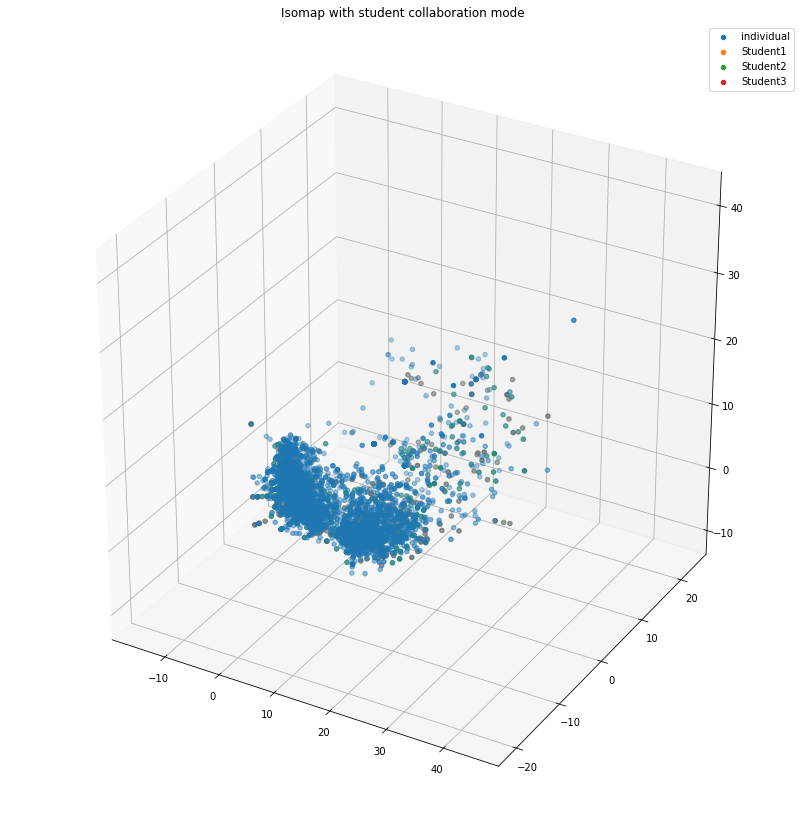

In [44]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with student collaboration mode')
plt.show()

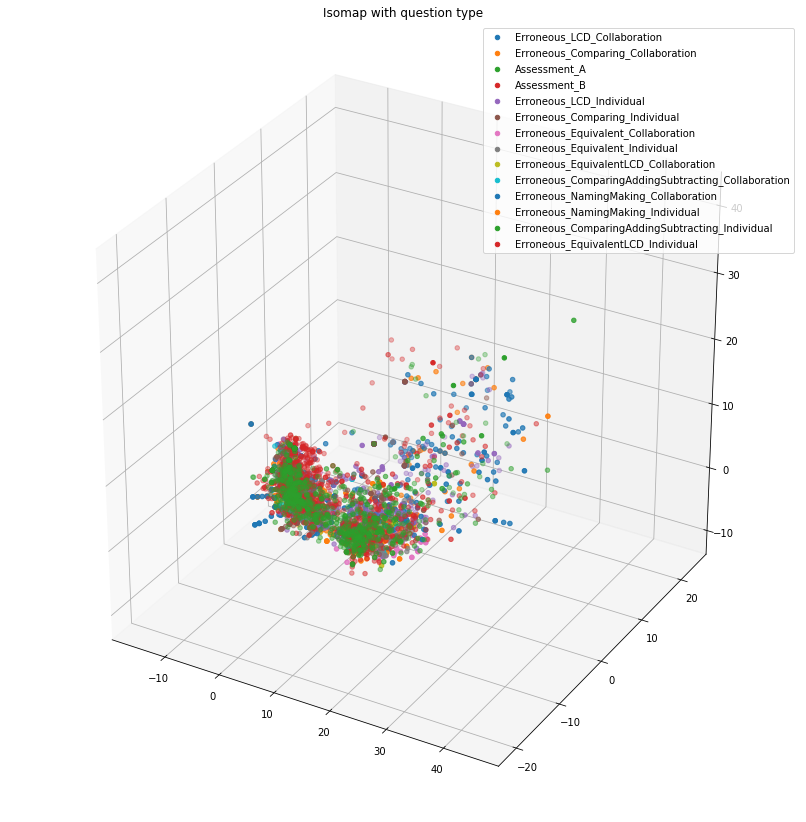

In [45]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with question type')
plt.show()

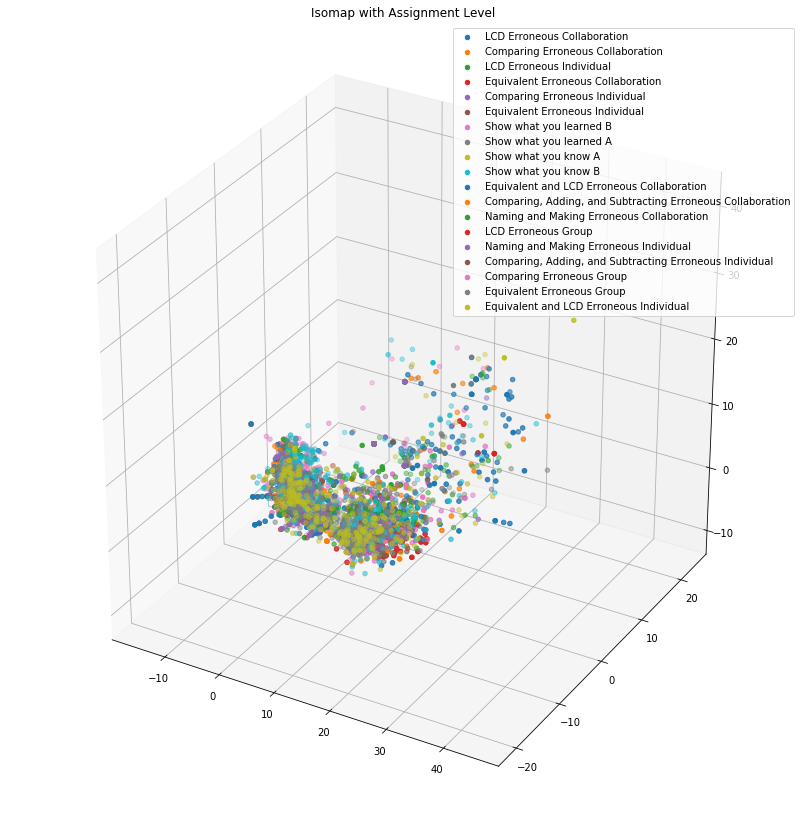

In [46]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Assignment Level')
plt.show()

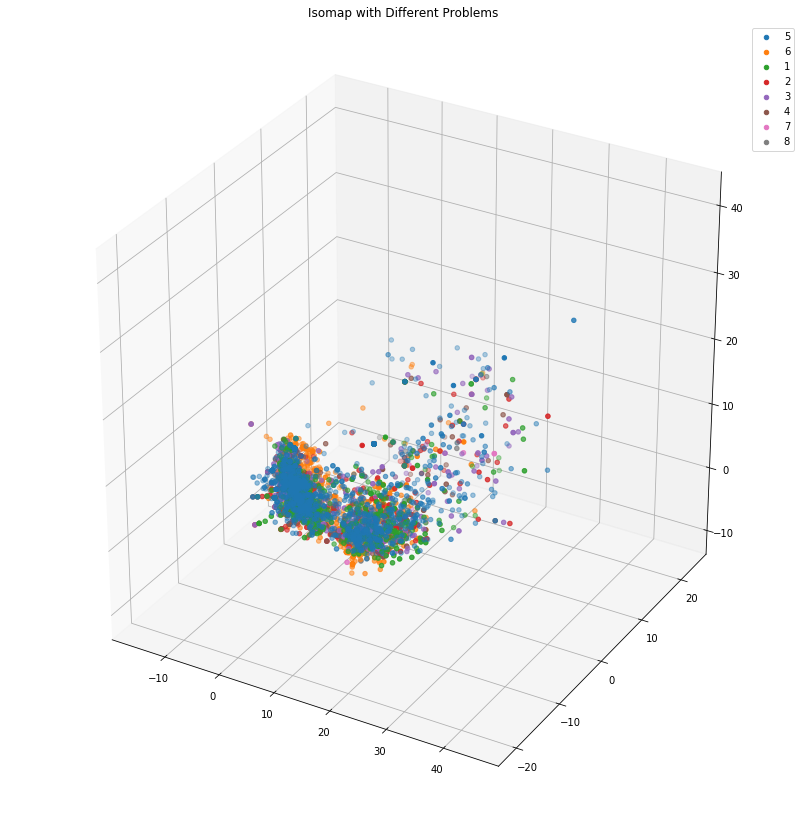

In [47]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Different Problems')
plt.show()

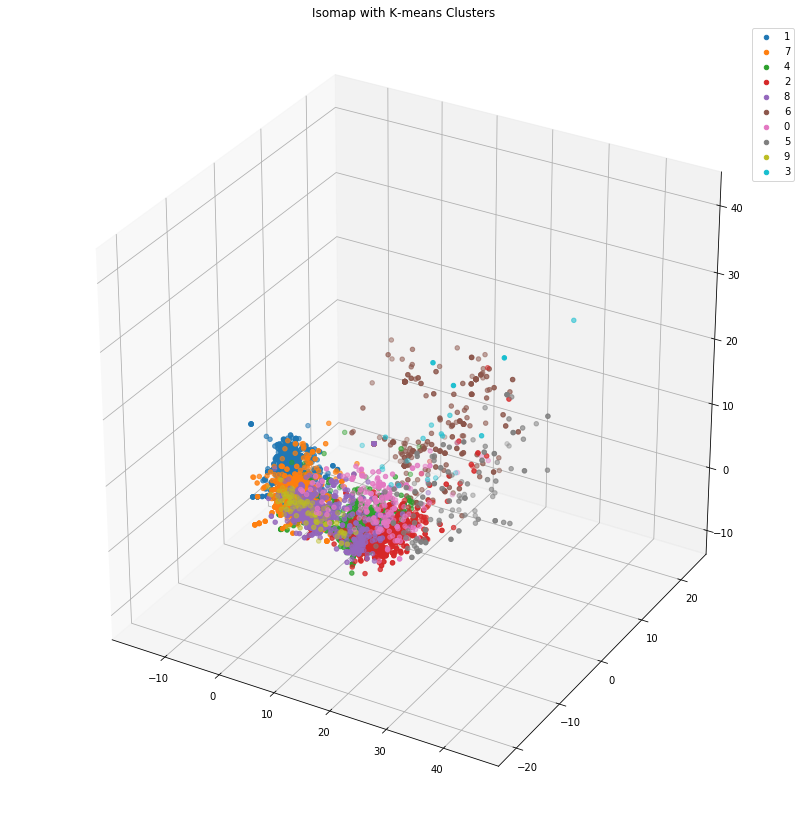

In [48]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with K-means Clusters')
plt.show()

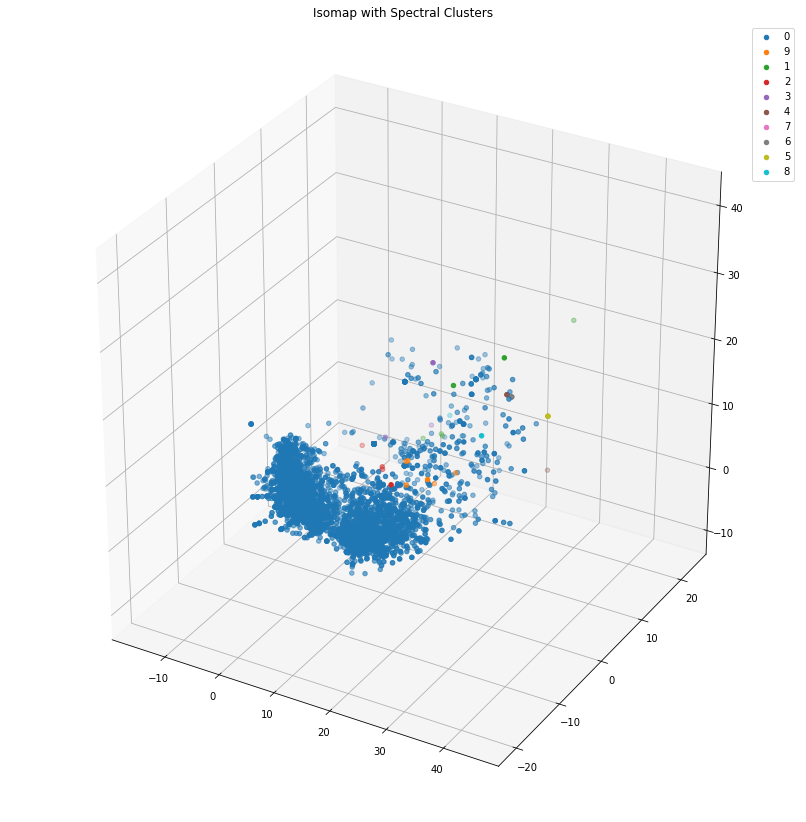

In [49]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(iso_predict[mask, 0], iso_predict[mask, 1], iso_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('Isomap with Spectral Clusters')
plt.show()

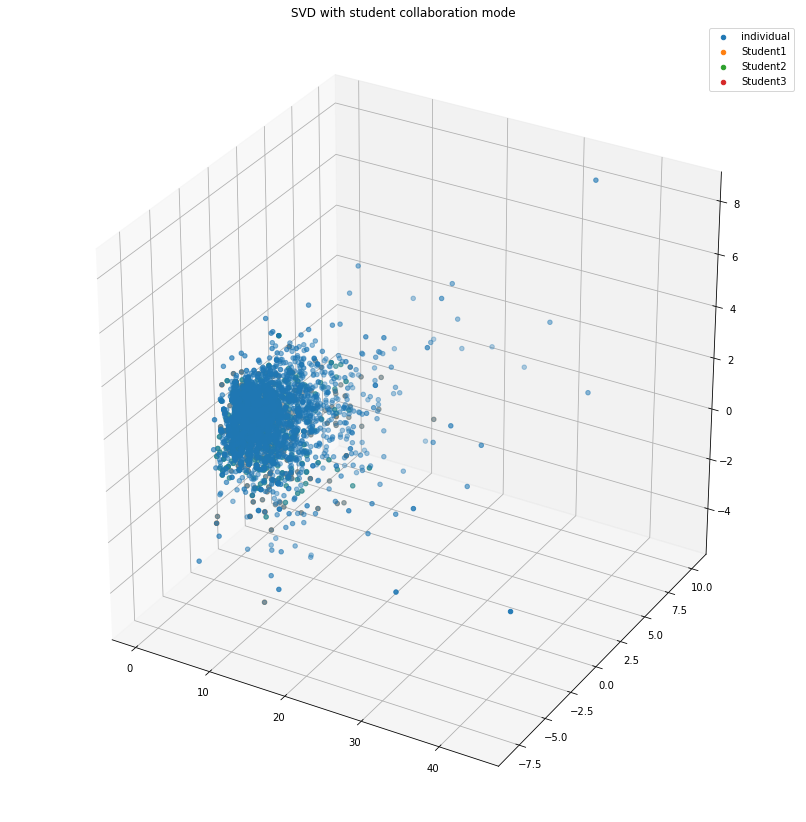

In [50]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Student Response Subtype'].value_counts().index:
    mask = data['Student Response Subtype'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with student collaboration mode')
plt.show()

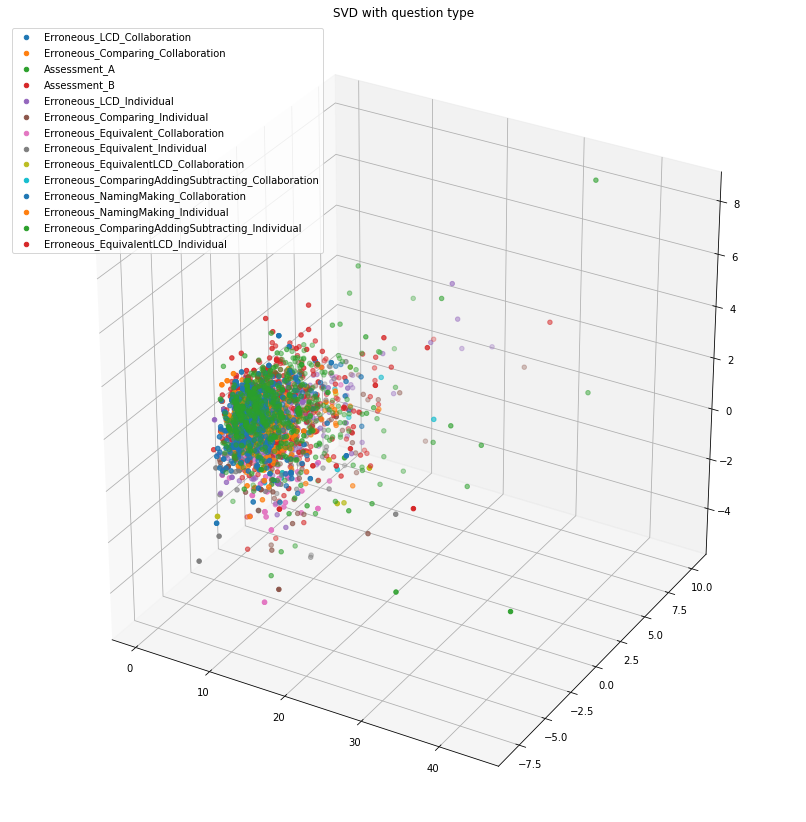

In [51]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (ProblemSet)'].value_counts().index:
    mask = data['Level (ProblemSet)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with question type')
plt.show()

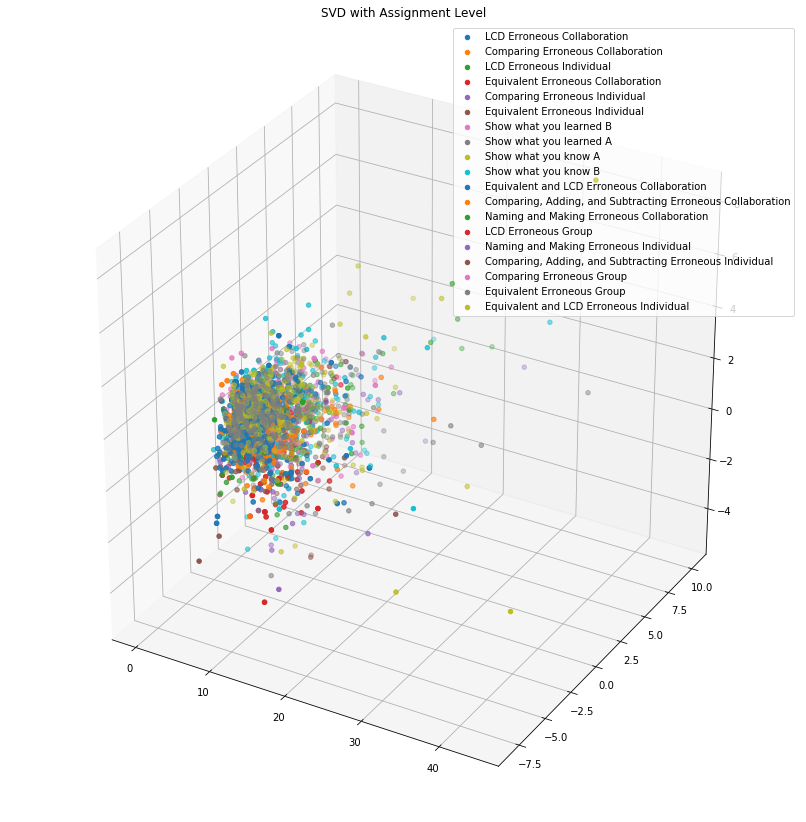

In [52]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['Level (Assignment)'].value_counts().index:
    mask = data['Level (Assignment)'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Assignment Level')
plt.show()

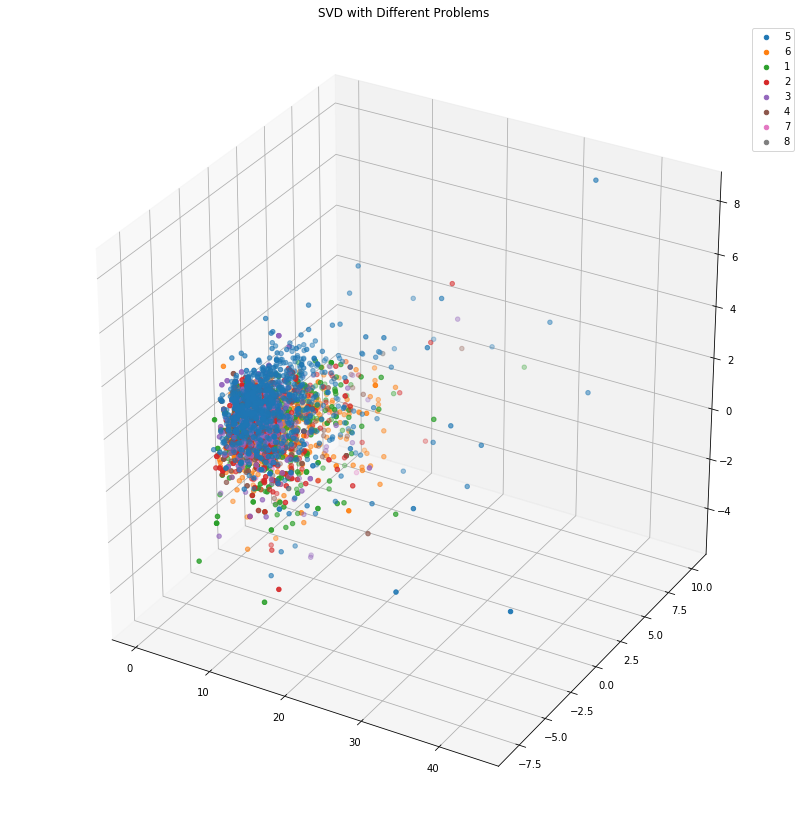

In [53]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['problem'].value_counts().index:
    mask = data['problem'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Different Problems')
plt.show()

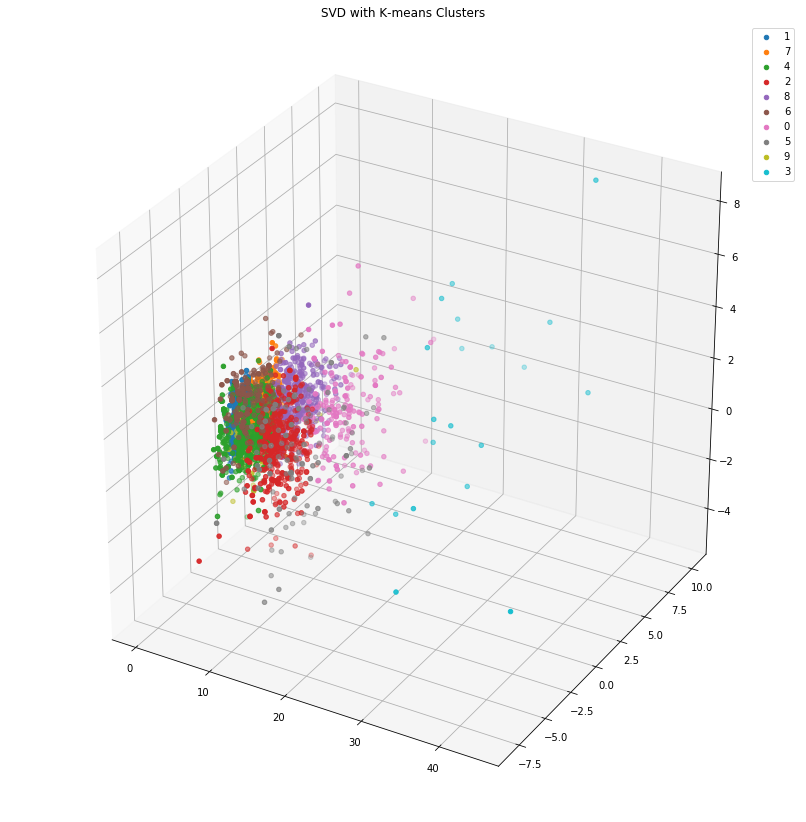

In [54]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['km_cluster'].value_counts().index:
    mask = data['km_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with K-means Clusters')
plt.show()

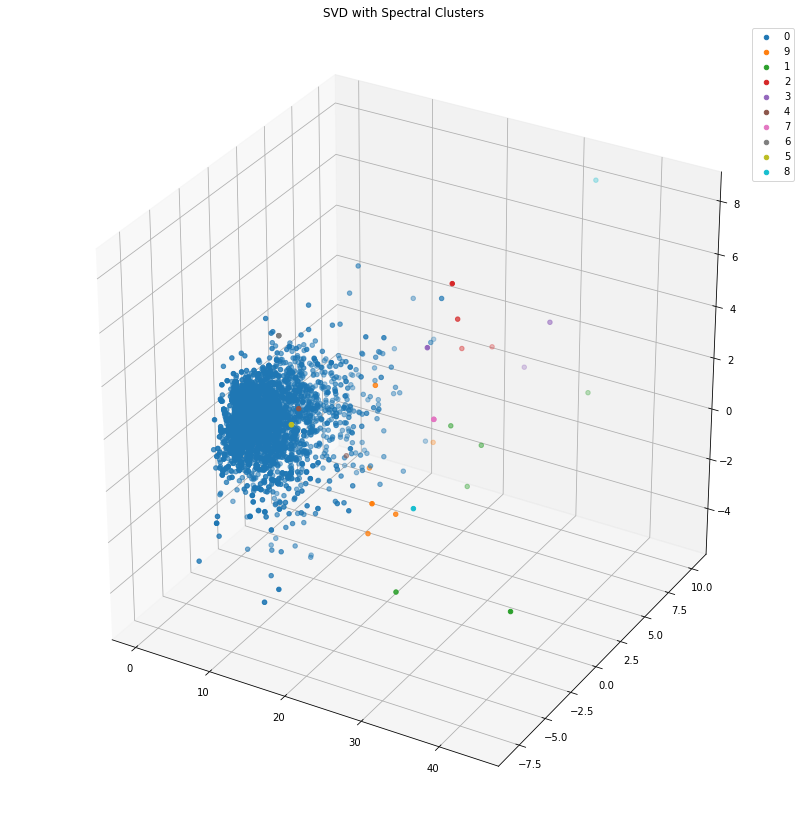

In [55]:
fig = plt.figure(figsize=(11,11))
ax = Axes3D(fig)
for temp_state in data['sp_cluster'].value_counts().index:
    mask = data['sp_cluster'] == temp_state
    ax.scatter(svd_predict[mask, 0], svd_predict[mask, 1], svd_predict[mask, 2], label=temp_state)
ax.legend()
ax.title.set_text('SVD with Spectral Clusters')
plt.show()

In [75]:
sklearn.metrics.homogeneity_completeness_v_measure(data['km_cluster'], data['Level (Assignment)'], beta=1.0)

(0.08877072801980328, 0.09733583943297298, 0.09285618930214481)